# Geopandas Demo
>To prevent any migraines, it's best to install geopandas in a clean Anaconda environment  
>- the library is available in the ArcGIS PRo package manager, but it usually will not install


>Depending on which application you launch python in, you may need to manually activate conda first
>- *Visual Studio Code* seems to do this automatically
>- *Pycharm* is easy to setup.
>        - When selecting the python interpreter, select Conda environment
>        - make sure the path to the conda executable is correct  
>    
>- For other IDES, you may need to launch from command line:
>    1. activate conda from command line (scripts\activate)
>    2. launch the application executable file (c:\Program Files (x86)\myApplication.exe)

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import pandas as pd

# show all columns
pd.options.display.max_columns = None

In [2]:
outputs = '.\\Outputs'
if not os.path.exists(outputs):
    os.makedirs(outputs)

### Reading in data
>- There are some syntax differences from ESRI SpatialDataFrames 
>- Important to notes geopandas cannot read in features from ESRI geodatabases
>- The geometry column is called "geometry", not "SHAPE"

In [3]:
buildings_sdf = gpd.read_file(r".\data\buildings_pts.shp")
buildings_sdf.shape

(81240, 12)

In [4]:
buildings_sdf.head()

,parcel_id,bldg_id,bldg_sqft,btype1,res_units,stories,year_blt,job_spaces,btype2,basebld,btype,geometry
0,4003.0,4003.0,6617.0,3.0,0.0,1.0,2006.0,6.0,3.0,1.0,Industrial,POINT (417030.186 4556204.506)
1,4820.0,4820.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,Open Space Non-Buildable,POINT (420406.454 4554542.500)
2,5407.0,5407.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Empty Buildable,POINT (421848.415 4554399.133)
3,11351.0,11351.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,Agriculture,POINT (417176.965 4556215.134)
4,11373.0,11373.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,POINT (420660.562 4554578.430)


### Static Mapping

<AxesSubplot: >

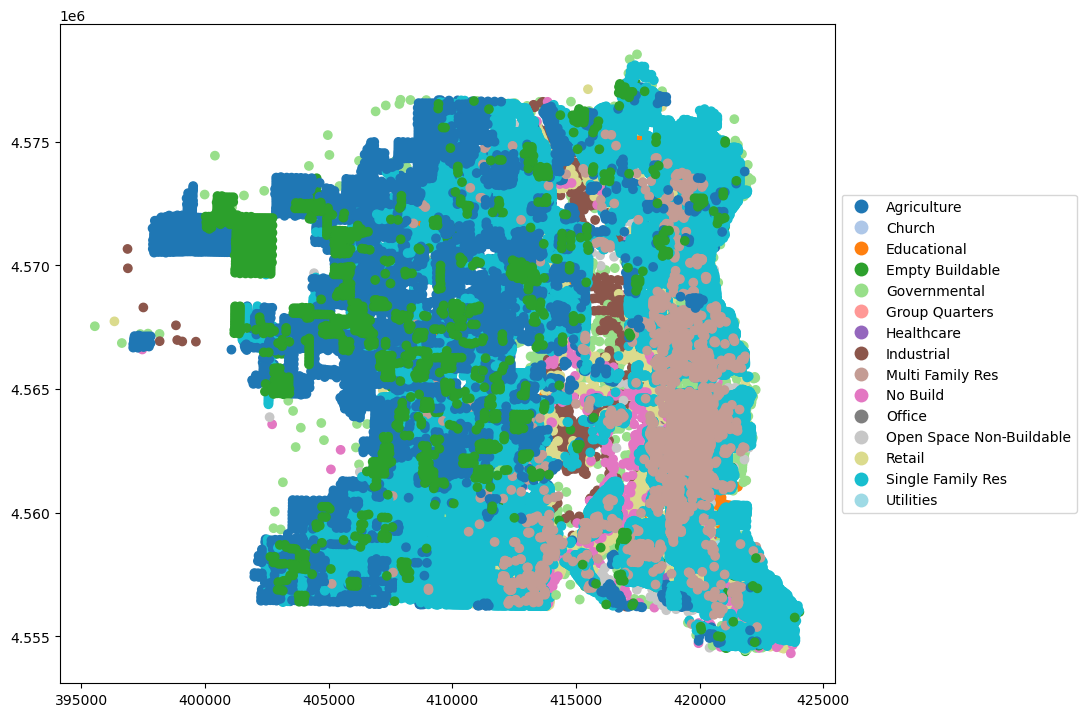

In [5]:
buildings_sdf.plot(column='btype', 
                   figsize=(10, 10),
                   cmap='tab20',
                   legend=True,
                   legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})

## Buffer Example
>- Buffering is pretty simple
>- Need to be mindful of CRS and linear units

In [56]:
bus_lanes_sdf = gpd.read_file(r".\data\wb_LocalBus.shp")
bus_lanes_sdf.head()

,v832_SE50_,v832_SE501,v832_SE5_1,v832_SE5_2,v832_SE5_3,v832_SE5_4,v832_SE5_5,v832_SE5_6,v832_SE5_7,v832_SE5_8,v832_SE5_9,v832_SE_10,v832_SE_11,v832_SE_12,v832_SE_13,v832_SE_14,v832_SE_15,v832_SE_16,v832_SE_17,v832_SE_18,v832_SE_19,v832_SE_20,v832_SE_21,v832_SE_22,v832_SE_23,v832_SE_24,v832_SE_25,v832_SE_26,v832_SE_27,v832_SE_28,v832_SE_29,v832_SE_30,v832_SE_31,v832_SE_32,v832_SE_33,v832_SE_34,v832_SE_35,v832_SE_36,v832_SE_37,v832_SE_38,v832_SE_39,v832_SE_40,v832_SE_41,v832_SE_42,v832_SE_43,v832_SE_44,v832_SE_45,v832_SE_46,v832_SE_47,v832_SE_48,v832_SE_49,v832_SE_50,v832_SE_51,v832_SE_52,v832_SE_53,Table_Sele,Table_Se_1,Table_Se_2,Table_Se_3,Table_Se_4,Table_Se_5,Table_Se_6,Table_Se_7,Table_Se_8,Table_Se_9,Table_S_10,Table_S_11,Table_S_12,Table_S_13,Table_S_14,Table_S_15,Table_S_16,Table_S_17,Table_S_18,Table_S_19,Table_S_20,Table_S_21,Table_S_22,Table_S_23,geometry
0,10008,21331,Cent,0.08669,2,1599,None,10008_21331,7,1,0,0,0,0,0,0.0,4,Urban,Urban,Centroid Connector,0,0.61,0,0,10000.0,0.0,17.0,0.3060,0.0,116.2,WB,OB,3,0,0,3,351599,35,SALT LAKE,403,20120,Draper,11,South-central SL,32,"Riv, I-15 to MVC",387,"Riv, I-15 to MVC",0,None,0,0,0.0,0.0,0,3080,10008,21331,4,0,SF514,SF514,0.09,0.51,1,30.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10008_21331,"LINESTRING (423401.152 4485422.991, 423275.969..."
1,10010,21973,Cent,0.10670,2,1562,None,10010_21973,7,1,0,0,0,0,0,0.0,4,Urban,Urban,Centroid Connector,0,0.75,0,0,10000.0,0.0,17.0,0.3766,0.0,108.3,WB,OB,3,0,0,3,351562,35,SALT LAKE,411,70850,South Jordan,11,South-central SL,31,"SJ, I-15 to MVC",376,"SJ, I-15 to MVC",0,None,0,0,0.0,0.0,0,3109,10010,21973,4,0,SF514,SF514,0.11,0.63,30,30.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10010_21973,"LINESTRING (423760.000 4490625.000, 423597.000..."
2,10019,15115,Cent,0.05377,2,947,None,10019_15115,7,1,0,0,0,0,0,0.0,5,CBD-like,Urban,Centroid Connector,0,0.38,0,0,10000.0,0.0,14.0,0.2305,0.0,312.7,EB,IB,1,0,1,3,350947,35,SALT LAKE,409,67000,Salt Lake City,8,SL CBD,23,SL CBD,228,SL CBD,0,None,0,0,0.0,0.0,0,2642,10019,15115,4,0,S509,S509,0.05,0.38,1,30.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10019_15115,"LINESTRING (423276.393 4512777.323, 423340.000..."
3,10021,25452,Cent,0.02249,2,949,None,10021_25452,7,1,0,0,0,0,0,0.0,5,CBD-like,Urban,Centroid Connector,0,0.16,0,0,10000.0,0.0,14.0,0.0964,0.0,310.7,EB,IB,1,0,1,3,350949,35,SALT LAKE,409,67000,Salt Lake City,8,SL CBD,23,SL CBD,229,SL CBD,0,None,0,0,0.0,0.0,0,2243,10021,25452,4,0,S223,S223,0.02,0.16,105,30.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10021_25452,"LINESTRING (423610.884 4513767.165, 423638.316..."
4,10025,26470,Cent,0.11015,2,622,None,10025_26470,7,1,0,0,0,0,0,0.0,4,Urban,Urban,Centroid Connector,0,0.77,0,0,10000.0,0.0,17.0,0.3888,0.0,216.8,SB,IB,1,0,0,2,110622,11,DAVIS,315,85370,Woods Cross,5,South Davis,16,"WX, Bountiful, NSL",144,"WX, Bountiful, NSL",0,None,0,0,0.0,0.0,0,7281,10025,26470,4,0,BRTNRedwd_T,North Redwood Corridor,0.11,0.55,16,15.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10025_26470,"LINESTRING (423899.021 4525990.539, 424005.108..."


In [72]:
# check the coordinate reference system units (meters)
bus_lanes_sdf.crs

<Derived Projected CRS: EPSG:26912>
Name: NAD83 / UTM zone 12N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 114°W and 108°W - onshore and offshore. Canada - Alberta; Northwest Territories; Nunavut; Saskatchewan. United States (USA) - Arizona; Colorado; Idaho; Montana; New Mexico; Utah; Wyoming.
- bounds: (-114.0, 31.33, -108.0, 84.0)
Coordinate Operation:
- name: UTM zone 12N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot: >

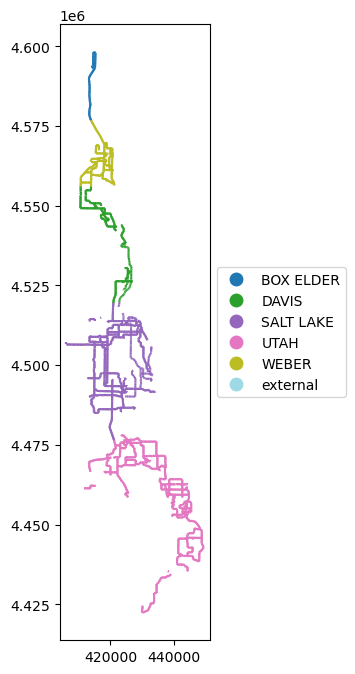

In [75]:
bus_lanes_sdf.plot(column='v832_SE_37', 
                   figsize=(8, 8),
                   cmap='tab20',
                   legend=True,
                   legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})

<AxesSubplot: >

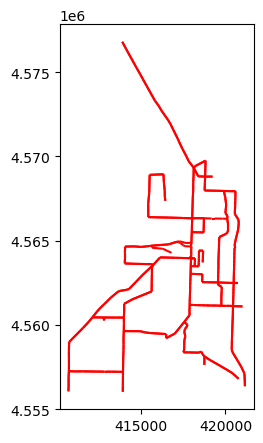

In [96]:
# Filter buslanes to Weber COunt and plot
bus_lanes_weber = bus_lanes_sdf[bus_lanes_sdf['v832_SE_37']== 'WEBER'].copy()

bus_lanes_weber.plot(
                   figsize=(5, 5),
                   color='red',
                   legend=True,
                   legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})

In [85]:
# Buffer by 0.4 miles
meters_to_buffer =  .4 * 1609.344
buffered_lanes = bus_lanes_weber.buffer(meters_to_buffer, join_style=2)

<AxesSubplot: >

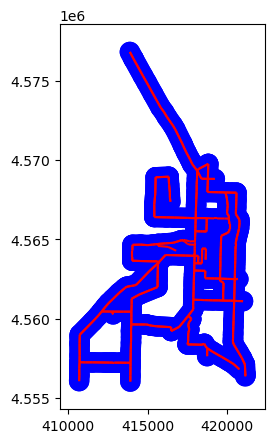

In [95]:
# Plot bus lanes (buffered and unbuffered)
ax1 = bus_lanes_weber.plot(
                   figsize=(5, 5),
                   color='red',
                   legend=True,
                   legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})

buffered_lanes.plot(ax=ax1, color='blue',  zorder=1)
ax1

## Spatial Join Example
> - Spatial join works pretty similiarly
> - The syntax works more like a SQL join
> - Any data aggregation needs to be done manually, where Arcpy has parameters dor this

<AxesSubplot: >

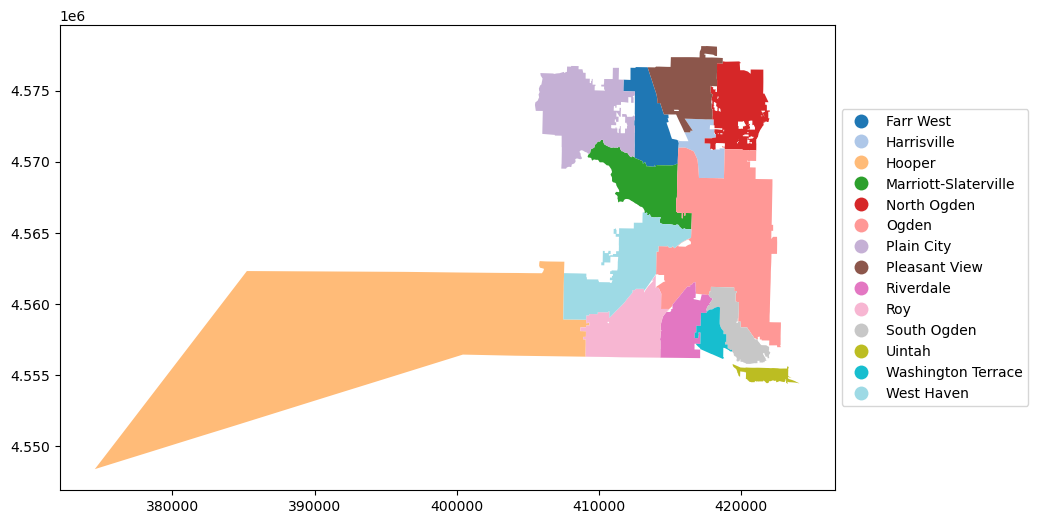

In [10]:
# read and plot Cities shapefile
weber_cities_sdf = gpd.read_file(r".\data\weber_cities.shp")
weber_cities_sdf.plot(column='NAME', 
                   figsize=(10, 10),
                   cmap='tab20',
                   legend=True,
                   legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})

In [11]:
# Join Cities attributes to the buildings points
cities_buildings_join = gpd.sjoin(weber_cities_sdf, buildings_sdf, how='left', predicate='intersects')
cities_buildings_join

,NAME,FIRST_MERG,FIRST_SALE,FIRST_POPL,FIRST_PO_1,AREA_SQMI,geometry,index_right,parcel_id,bldg_id,bldg_sqft,btype1,res_units,stories,year_blt,job_spaces,btype2,basebld,btype
0,Farr West,Cities,012,6042,7206,5.90364,"POLYGON ((413436.487 4576609.244, 413443.427 4...",69487,208720.0,208720.0,1478.0,1.0,1.0,1.0,2002.0,0.0,1.0,1.0,Single Family Res
0,Farr West,Cities,012,6042,7206,5.90364,"POLYGON ((413436.487 4576609.244, 413443.427 4...",69486,208719.0,208719.0,1293.0,1.0,1.0,1.0,2004.0,0.0,1.0,1.0,Single Family Res
0,Farr West,Cities,012,6042,7206,5.90364,"POLYGON ((413436.487 4576609.244, 413443.427 4...",69485,208718.0,208718.0,1518.0,1.0,1.0,1.0,2003.0,0.0,1.0,1.0,Single Family Res
0,Farr West,Cities,012,6042,7206,5.90364,"POLYGON ((413436.487 4576609.244, 413443.427 4...",69493,208726.0,208726.0,2457.0,1.0,1.0,1.0,2002.0,0.0,1.0,1.0,Single Family Res
0,Farr West,Cities,012,6042,7206,5.90364,"POLYGON ((413436.487 4576609.244, 413443.427 4...",69494,208727.0,208727.0,1597.0,1.0,1.0,1.0,2002.0,0.0,1.0,1.0,Single Family Res
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,West Haven,Cities,051,10433,15239,10.68940,"POLYGON ((410771.987 4561787.974, 410778.220 4...",59995,199196.0,199196.0,4230.0,1.0,1.0,1.0,2005.0,0.0,1.0,1.0,Single Family Res
13,West Haven,Cities,051,10433,15239,10.68940,"POLYGON ((410771.987 4561787.974, 410778.220 4...",60994,200198.0,200198.0,1570.0,1.0,1.0,1.0,2018.0,0.0,1.0,1.0,Single Family Res
13,West Haven,Cities,051,10433,15239,10.68940,"POLYGON ((410771.987 4561787.974, 410778.220 4...",60993,200197.0,200197.0,2212.0,1.0,1.0,1.0,2017.0,0.0,1.0,1.0,Single Family Res
13,West Haven,Cities,051,10433,15239,10.68940,"POLYGON ((410771.987 4561787.974, 410778.220 4...",59985,199186.0,199186.0,1726.0,1.0,1.0,1.0,2005.0,0.0,1.0,1.0,Single Family Res


In [12]:
cb_agg = cities_buildings_join.groupby('NAME', as_index=False)[['res_units','job_spaces']].sum()
cb_agg

,NAME,res_units,job_spaces
0,Farr West,2405.0,4258.0
1,Harrisville,2261.0,2487.0
2,Hooper,2574.0,330.0
3,Marriott-Slaterville,675.0,2474.0
4,North Ogden,6894.0,3535.0
5,Ogden,32786.0,77033.0
6,Plain City,2364.0,694.0
7,Pleasant View,3288.0,2886.0
8,Riverdale,3383.0,8973.0
9,Roy,13061.0,9220.0


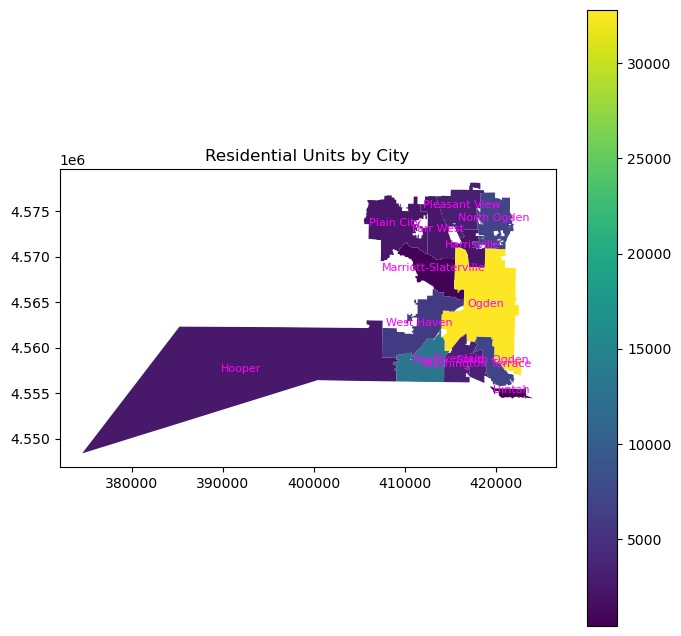

In [13]:
# join the aggregated data back to the original cities shape
weber_rUnits_jSpaces= weber_cities_sdf.merge(cb_agg, on='NAME', how='left')
ax = weber_rUnits_jSpaces.plot(column='res_units', 
                   figsize=(8, 8),
                   legend=True)
ax.set_title('Residential Units by City')

# add labels
for idx, row in weber_rUnits_jSpaces.iterrows():
    ax.annotate(text=row['NAME'], xy=row['geometry'].centroid.coords[0], horizontalalignment='center', fontsize=8, color='magenta')

#### TDM Example: Join Link Midpoints with Toll zones with spatial join

**Arcpy Command:**  
>```
>arcpy.SpatialJoin_analysis(target_features=out_link_mp, 
>                            join_features=tollz_shp, 
>                            out_feature_classlink_taz_sj, 
>                            join_operation="JOIN_ONE_TO_ONE", 
>                            join_type="", 
>                            field_mapping="", 
>                            match_option="WITHIN")

**Geopandas Command:**

In [14]:
# read in data
out_link_mp = gpd.read_file(r".\data\C1_Link_Midponts.shp")
tollz_shp = gpd.read_file(r".\data\Tollz_shp.shp")

In [15]:
# run the spatial join
mp_tollz = out_link_mp.sjoin(tollz_shp, how="inner", predicate='within')
mp_tollz

,A,B,STREET,DISTANCE,ONEWAY,TAZID,SEGID,LINKID,LANES,FT,HOV_LYEAR,TRK_RSTRCT,SFAC,CFAC,HOT_ZONEID,DISTEXCEPT,AREATYPE,ATYPENAME,ATYPEGRP,FTCLASS,EXTERNAL,LANE_MILE,RMPGPID,MANFWYID,CAP1HR1LN,ADHOVCAP1H,FF_SPD,FF_TIME,FF_RAMPPEN,ANGLE,DIRECTION,IB_OB,PKDIRPRD,REL_LN,CBD,COUNTY,CO_TAZID,CO_FIPS,CO_NAME,CITY,CITY_FIPS,CITY_NAME,DISTLRG,DLRG_NAME,DISTMED,DMED_NAME,DISTSML,DSML_NAME,WARNL,WARNLTXT,OP_PROJ,SEL_LINK,X_MID,Y_MID,geometry,index_right,OBJECTID,Name,EL_Zone,Shape_Leng,Shape_Area
0,20134,62770,MVC,0.51503,1,1629,WFRC_8198,20134_62770,4,33,0,0,0,0,0,0.0,3,Suburban,Urban,Freeway,0,2.06,0,0,2185.26196,0,75,0.4120,0,217.3,SB,OB,3,0,0,3,351629,35,SALT LAKE,404,34970,Herriman,11,South-central SL,32,"Riv, I-15 to MVC",395,"Riv, I-15 to MVC",0,None,0,0,420830.82570,4.476593e+06,POINT (420830.826 4476592.789),36,314,MVC,445,40014.674561,3.949738e+06
2,20150,20171,MVC,0.53277,1,1606,0085_005.8,20150_20171,3,34,12041,0,0,0,0,0.0,3,Suburban,Urban,Freeway,0,1.60,0,0,2347.63477,0,73,0.4379,0,231.2,EB,IB,1,0,0,3,351606,35,SALT LAKE,404,34970,Herriman,11,South-central SL,32,"Riv, I-15 to MVC",388,"Riv, I-15 to MVC",0,None,0,0,415562.86655,4.482221e+06,POINT (415562.867 4482220.595),36,314,MVC,445,40014.674561,3.949738e+06
3,20154,20175,HOV MVC S,0.53448,1,1606,0085_005.8,20154_20175,1,38,0,0,0,0,0,0.0,3,Suburban,Urban,Freeway,0,0.53,0,0,2112.15400,0,77,0.4165,0,230.8,EB,IB,1,0,0,3,351606,35,SALT LAKE,404,34970,Herriman,11,South-central SL,32,"Riv, I-15 to MVC",388,"Riv, I-15 to MVC",0,None,0,0,415570.48000,4.482238e+06,POINT (415570.480 4482237.536),36,314,MVC,445,40014.674561,3.949738e+06
4,20155,20150,MVC,0.19756,1,1606,0085_006.0,20155_20150,3,34,12041,0,0,0,0,0.0,3,Suburban,Urban,Freeway,0,0.59,0,0,2347.63477,0,73,0.1624,0,218.6,SB,OB,3,0,0,3,351606,35,SALT LAKE,404,34970,Herriman,11,South-central SL,32,"Riv, I-15 to MVC",388,"Riv, I-15 to MVC",0,None,0,0,415129.52160,4.482613e+06,POINT (415129.522 4482613.400),36,314,MVC,445,40014.674561,3.949738e+06
6,20160,20134,MVC,0.69626,1,1629,WFRC_8198,20160_20134,4,33,0,0,0,0,0,0.0,3,Suburban,Urban,Freeway,0,2.79,0,0,2185.26196,0,75,0.5570,0,214.4,SB,OB,3,0,0,3,351629,35,SALT LAKE,404,34970,Herriman,11,South-central SL,32,"Riv, I-15 to MVC",395,"Riv, I-15 to MVC",0,None,0,0,420263.64065,4.477385e+06,POINT (420263.641 4477385.087),36,314,MVC,445,40014.674561,3.949738e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4846,71567,62362,I-15,0.08406,1,2189,0145_006.2,71567_62362,1,31,0,0,0,0,0,0.0,4,Urban,Urban,Freeway,0,0.08,0,0,1473.00000,0,55,0.0917,0,106.4,WB,OB,3,0,0,4,492189,49,UTAH,1310,1310,American Fork,14,Northeast,40,AF-PG,496,AF-PG,0,None,0,0,430101.16045,4.469961e+06,POINT (430101.160 4469961.257),25,37,I15,265,32992.783714,3.233080e+06
4847,71570,60791,I-15,0.09044,1,2189,None,71570_60791,1,31,0,0,0,0,0,0.0,4,Urban,Urban,Freeway,0,0.09,0,0,1473.00000,0,55,0.0987,0,345.1,NB,OB,3,0,0,4,492189,49,UTAH,1310,1310,American Fork,14,Northeast,40,AF-PG,496,AF-PG,0,None,0,0,430392.55165,4.469934e+06,POINT (430392.552 4469934.495),25,37,I15,265,32992.783714,3.233080e+06
4848,71571,71567,I-15,0.04183,1,2189,None,71571_71567,1,31,0,0,0,0,0,0.0,4,Urban,Urban,Freeway,0,0.04,0,0,1473.00000,0,55,0.0456,0,156.0,SB,IB,1,0,0,4,492189,49,UTAH,1310,1310,American Fork,14,Northeast,40,AF-PG,496,AF-PG,0,None,0,0,430179.71200,4.470011e+06,POINT (430179.712 4470011.127),25,37,I15,265,32992.783714,3.233080e+06
4851,71582,60640,HOV I-15,0.19549,1,2258,None,71582_60640,1,38,0,0,0,0,0,0.0,4,Urban,Urban,Freeway,0,0.20,0,0,2310.05800,0,77,0.1523,0,228.6,EB,IB,1,0,0,4,492258,49,UTAH,5730,57300,Orem,15,Central,41,Orem-Vineyard,503,Orem-Vineyard,0,None,0,0,437896.30150,4.464150e+06,POINT (437896.302 4464149.747),25,37,I15,265,32992.783714,3.233080e+06


In [16]:
# write the result to shapefile
mp_tollz.to_file(r".\Outputs\mp_tollz.shp")

c:\Users\jreynolds\Anaconda3\envs\testgeo2\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\jreynolds\AppData\Local\Temp\ipykernel_19332\4238419022.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  mp_tollz.to_file(r".\Outputs\mp_tollz.shp")


## Interactive map

In [17]:
weber_rUnits_jSpaces.explore(column="job_spaces",
                             scheme="naturalbreaks",
                             k=5, height=600, width=800
                             )



c:\Users\jreynolds\Anaconda3\envs\testgeo2\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
